# Class 7 Assignment<br>Maheen Ahmed

## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Dataset:

In [2]:
df = pd.read_csv('house_data.csv')

Preprocessing:

In [3]:
#checking for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: ['municipality_name', 'object_type_name']


In [4]:
#one hot encoding
if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

In [5]:
#missing values handling
df.fillna(df.median(), inplace=True) 
df.fillna(df.mode().iloc[0], inplace=True)

In [6]:
# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training:

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluation:

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}, Adjusted R-squared: {adj_r2:.2f}')

Model Evaluation:
MSE: 33764166826233150792794112.00, R-squared: -116378488616002.80, Adjusted R-squared: -206290698791839.19


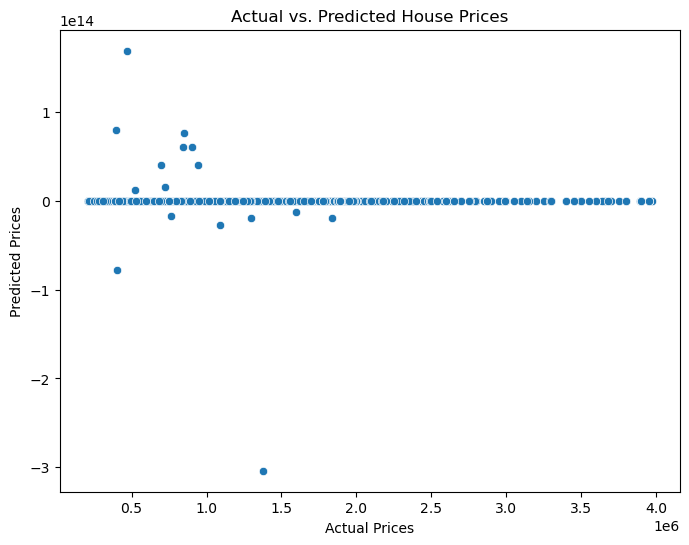

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

## Task 2

In [22]:
!pip install statsmodels streamlit

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st 

Dataset:

In [13]:
df = pd.read_csv('salary_data.csv')

Preprocessing:

In [14]:
#missing values
df.dropna(inplace=True)

#categorical columns  identification
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

#one hot encoding
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

Dependent and independent columns:

In [15]:
X = df.drop(columns=['Salary'])  #indep
y = df['Salary']  #dep

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training:

In [16]:
X_train_ols = sm.add_constant(X_train)  # Add intercept term
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

model = LinearRegression()
model.fit(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           1.91e-17
Time:                        09:45:40   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2285.938     

LinearRegression()

Evaluation:

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'\nModel Evaluation:')
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Adjusted R-squared: {adj_r2:.2f}')


Model Evaluation:
MSE: 49830096.86
R-squared: 0.90
Adjusted R-squared: 0.88


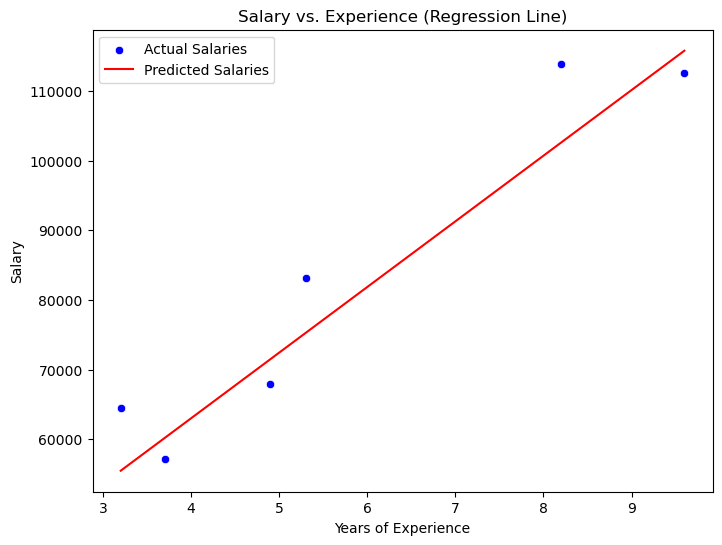

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, label="Actual Salaries", color='blue')
sns.lineplot(x=X_test['YearsExperience'], y=y_pred, label="Predicted Salaries", color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Experience (Regression Line)")
plt.legend()
plt.show()

Web App is implemented in a separate Python file using Streamlit and its image is also attached in this folder.

## Task 3

In [25]:
!pip install yfinance --quiet

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

ticker = 'AAPL'
df = get_stock_data(ticker)

X = df[['Day', 'Volume']]
y = df['Close']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

MSE: 259.87254406944925
R-squared: 0.8456336091708055
Adjusted R-squared: 0.8443937184814144


## Task 4

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
df = pd.read_csv('customer_churn_data.csv')

df.drop(columns=['customerID'], inplace=True)  #unique identifier removal
df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True) 
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}) 

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].median(), inplace=True)

X = df.drop(columns=['Churn'])
y = df['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\mahee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
coefficients = pd.Series(model.coef_[0], index=X.columns)

print(f'Accuracy: {accuracy:.2f}\n')
print(report)
print('\nRegression Coefficients:')
print(coefficients)

Accuracy: 0.82

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409


Regression Coefficients:
SeniorCitizen                            0.159329
tenure                                  -0.055881
MonthlyCharges                           0.008802
TotalCharges                             0.000293
gender_Male                             -0.049106
Partner_Yes                              0.055799
Dependents_Yes                          -0.160303
PhoneService_Yes                        -0.820309
MultipleLines_Yes                        0.189960
InternetService_Fiber optic              0.504509
InternetService_No                      -0.542984
OnlineSecurity_Yes                      -0.497334
OnlineBackup_Yes               

## Task 5

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df = pd.read_csv("owid-energy-data.csv")

df.dropna(inplace=True)

energy_columns = [col for col in df.columns if "consumption" in col.lower()]
if not energy_columns:
    raise KeyError("No energy consumption column found in dataset.")
energy_column = energy_columns[0]

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop(columns=[energy_column])
y = df[energy_column]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')

MSE: 0.05, R-squared: 1.00


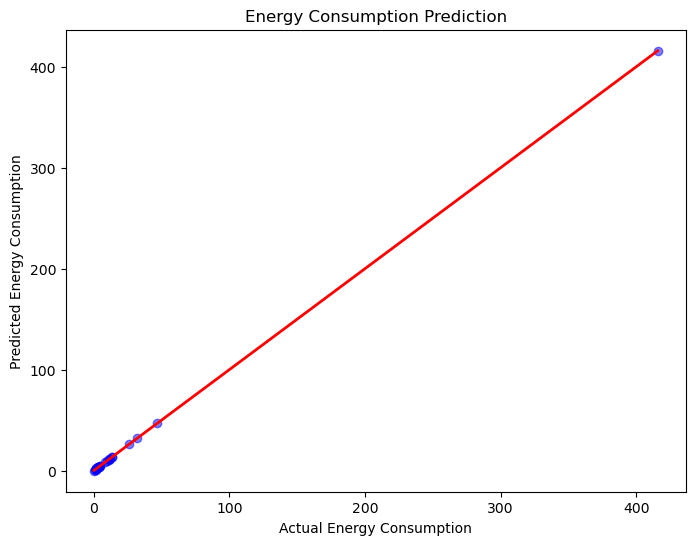

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Energy Consumption Prediction')
plt.show()